# **EV Motor Segementation**

In [ ]:
import pandas as pd

In [ ]:
df_ev=pd.read_csv("/kaggle/input/india-ev-market-data/EV Maker by Place.csv")
df_ev

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu
...,...,...,...
57,YC Electric Vehicle,Delhi,Delhi
58,Dilli Electric Auto Pvt Ltd,New Delhi,Delhi
59,Electrotherm India,Ahmedabad,Gujarat
60,Lohia Auto Industries,Kashipur,Uttarakhand


# **Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Segmentation: Count EV makers by state
state_counts = df_ev['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Number of EV Makers']
state_counts = state_counts.sort_values(by='Number of EV Makers', ascending=False)

# Display top states
print(state_counts.head(10))


         State  Number of EV Makers
0  Maharashtra                   15
1   Tamil Nadu                   11
2    Karnataka                    6
3      Haryana                    6
4      Gujarat                    5
5        Delhi                    4
6    Rajasthan                    4
7    Telangana                    3
8  West Bengal                    3
9  Uttarakhand                    2


/tmp/ipython-input-1236749791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_counts.head(10), x="State", y="Number of EV Makers", palette="crest")


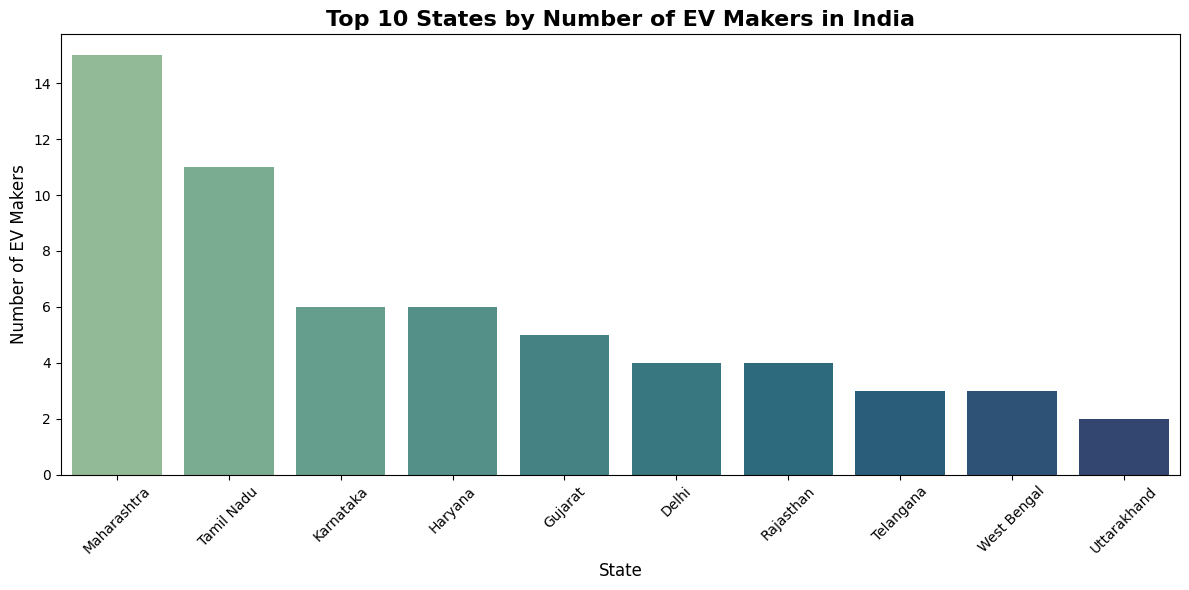

In [ ]:
# --- Bar Chart: Top 10 States ---
plt.figure(figsize=(12,6))
sns.barplot(data=state_counts.head(10), x="State", y="Number of EV Makers", palette="crest")
plt.title("Top 10 States by Number of EV Makers in India", fontsize=16, fontweight='bold')
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of EV Makers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

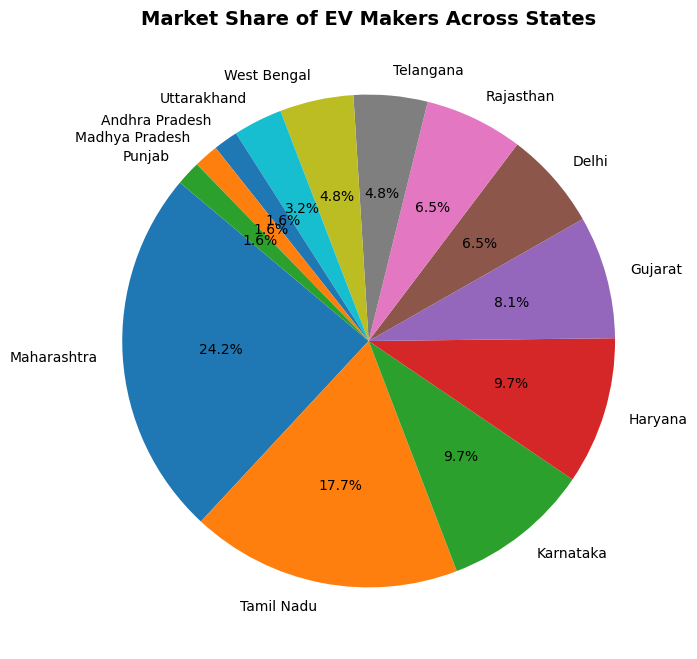

In [ ]:

# --- Pie Chart: Market Share ---
plt.figure(figsize=(8,8))
plt.pie(state_counts["Number of EV Makers"], labels=state_counts["State"], autopct='%1.1f%%', startangle=140)
plt.title("Market Share of EV Makers Across States", fontsize=14, fontweight='bold')
plt.show()

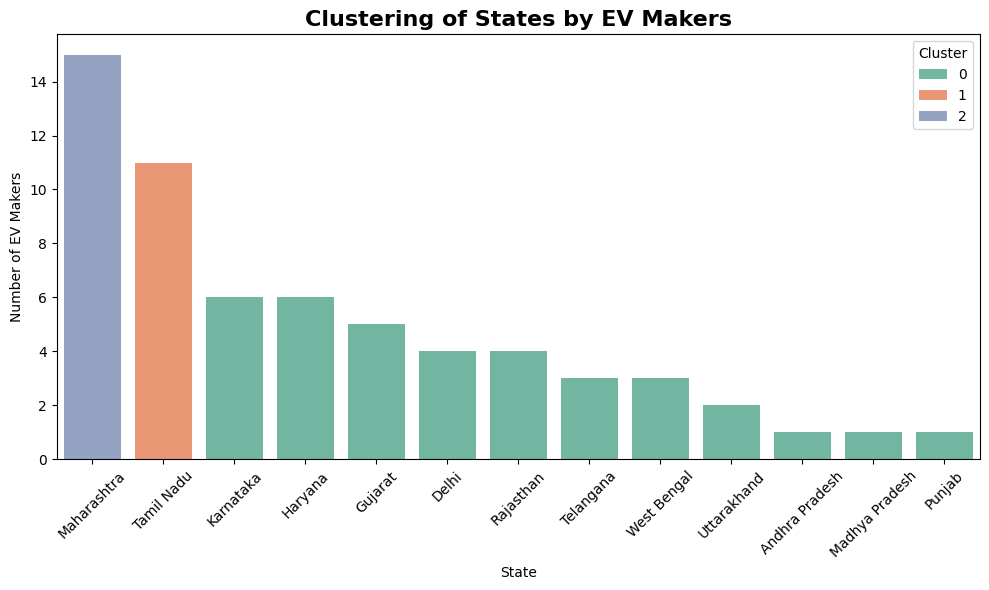

,State,Number of EV Makers,Cluster
3,Haryana,6,0
2,Karnataka,6,0
5,Delhi,4,0
4,Gujarat,5,0
6,Rajasthan,4,0
7,Telangana,3,0
9,Uttarakhand,2,0
8,West Bengal,3,0
12,Punjab,1,0
11,Madhya Pradesh,1,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- Prepare Data ---
state_counts = df_ev['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Number of EV Makers']

# --- Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(state_counts[['Number of EV Makers']])

# --- Apply KMeans Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)  # You can try 3, 4, or 5 clusters
state_counts['Cluster'] = kmeans.fit_predict(X_scaled)

# --- Visualization: Clustered States ---
plt.figure(figsize=(10,6))
sns.barplot(data=state_counts.sort_values('Number of EV Makers', ascending=False),
            x='State', y='Number of EV Makers', hue='Cluster', palette='Set2')
plt.title("Clustering of States by EV Makers", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Show Clustered Data ---
state_counts.sort_values('Cluster').head(15)


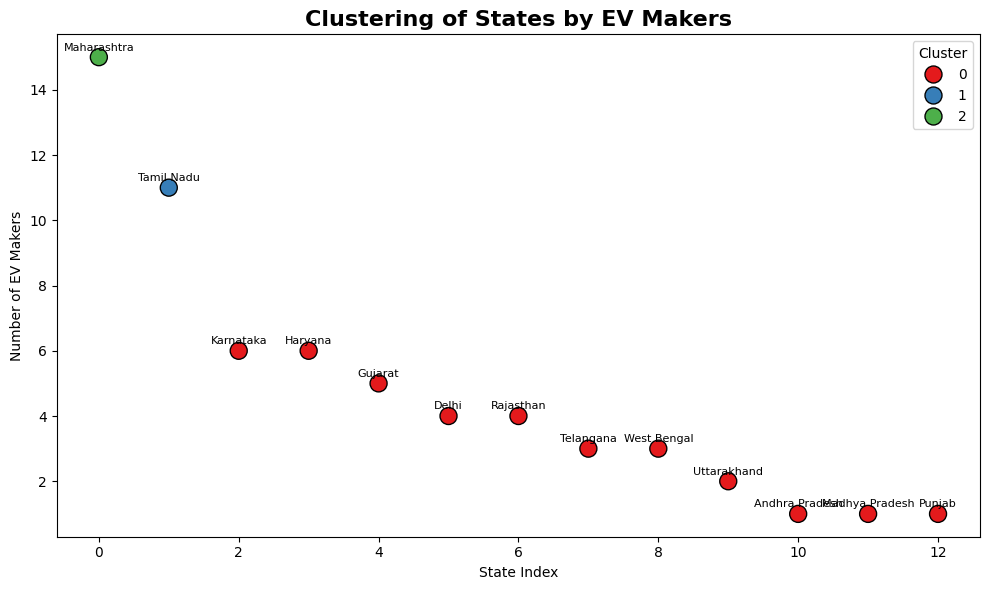

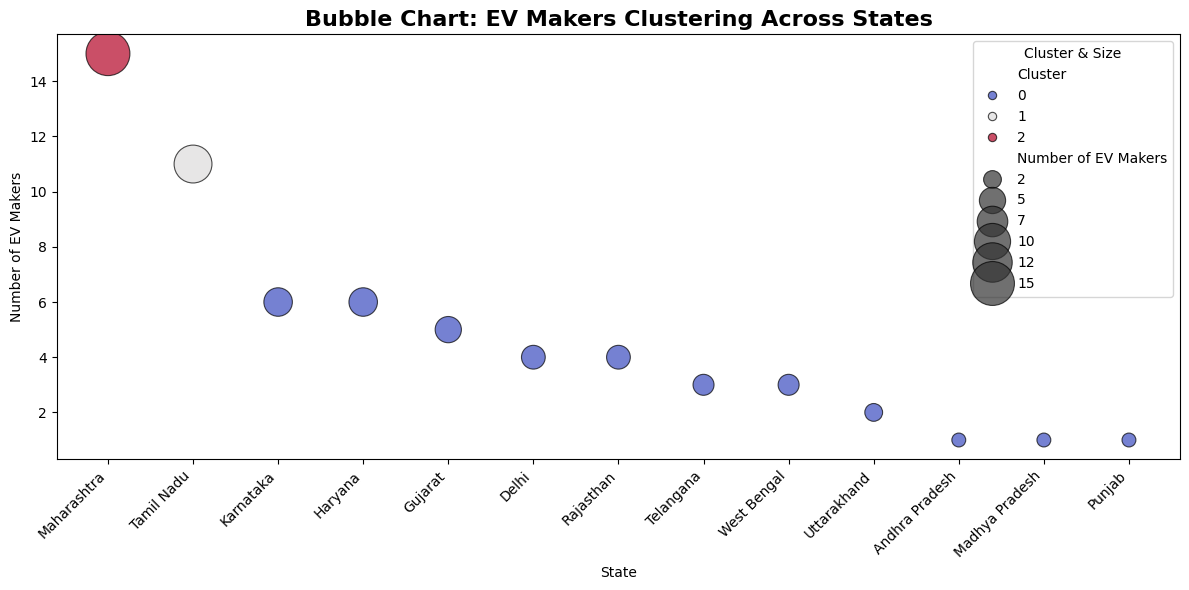

In [ ]:
# --- Data Preparation ---
state_counts = df_ev['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Number of EV Makers']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(state_counts[['Number of EV Makers']])

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
state_counts['Cluster'] = kmeans.fit_predict(X_scaled)

# --- Better Visualization: Scatter Plot with Cluster Colors ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=state_counts,
                x=state_counts.index,
                y="Number of EV Makers",
                hue="Cluster",
                palette="Set1",
                s=150, edgecolor="black")

# Add labels for states
for i, row in state_counts.iterrows():
    plt.text(row.name, row["Number of EV Makers"]+0.2, row["State"],
             ha="center", fontsize=8)

plt.title("Clustering of States by EV Makers", fontsize=16, fontweight="bold")
plt.xlabel("State Index")
plt.ylabel("Number of EV Makers")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# --- Alternative: Bubble Chart ---
plt.figure(figsize=(12,6))
sns.scatterplot(data=state_counts,
                x="State", y="Number of EV Makers",
                hue="Cluster", size="Number of EV Makers",
                palette="coolwarm", sizes=(100, 1000), alpha=0.7, edgecolor="black")

plt.title("Bubble Chart: EV Makers Clustering Across States", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Number of EV Makers")
plt.legend(title="Cluster & Size")
plt.tight_layout()
plt.show()